# Annexe du tp1: création du dataset

## Récupération des données brutes

https://archive.ics.uci.edu/ml/datasets/adult

**Abstract:** Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

**Data Set Information:**
Extraction was done by Barry Becker from the 1994 Census database. 
Prediction task is to determine whether a person makes over 50K a year.

In [1]:
import os, requests

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/"
path = "data"
if not os.path.exists(path):
    os.mkdir(path)

for filename in ["adult.data", "adult.names", "adult.test"]:
    r = requests.get(url + filename)
    with open(os.path.join(path, filename), 'wb') as fd:
        for chunk in r.iter_content(chunk_size=128):
            fd.write(chunk)

On regarde les 5 premières lignes de ces fichiers `data/adult.data` et `data/adult.test`

In [3]:
filename = "adult.data"
with open(os.path.join(path, filename), 'r') as f:
    for line, k  in zip(f, range(5)): 
        print(line.strip())

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K


In [4]:
filename = "adult.test"
with open(os.path.join(path, filename), 'r') as f:
    for line, k  in zip(f, range(5)): 
        print(line.strip())
# attention à la première ligne 
# attention au point . à la fin des lignes...

|1x3 Cross validator
25, Private, 226802, 11th, 7, Never-married, Machine-op-inspct, Own-child, Black, Male, 0, 0, 40, United-States, <=50K.
38, Private, 89814, HS-grad, 9, Married-civ-spouse, Farming-fishing, Husband, White, Male, 0, 0, 50, United-States, <=50K.
28, Local-gov, 336951, Assoc-acdm, 12, Married-civ-spouse, Protective-serv, Husband, White, Male, 0, 0, 40, United-States, >50K.
44, Private, 160323, Some-college, 10, Married-civ-spouse, Machine-op-inspct, Husband, Black, Male, 7688, 0, 40, United-States, >50K.


In [5]:
import pandas as pd

In [6]:
headers = ["age", "workclass", "fnlwgt", "education", "education-num", 
           "marital-status", "occupation", "relationship", "race", "sex", 
           "capital-gain", "capital-loss", "hours-per-week", "native-country", 
           "class"]
train_raw = pd.read_csv('data/adult.data', header=None, names=headers, 
                        sep=', ', na_values=["?"], engine='python')
test_raw = pd.read_csv('data/adult.test', header=None, names=headers, 
                       sep=', ', na_values=["?"], 
                       skiprows=1, engine='python')
dataset = pd.concat([ 
    train_raw, 
    test_raw.replace({"<=50K.": "<=50K", ">50K.": ">50K"}) 
])

print("Le dataset contient", dataset.shape[0], "lignes de données et",
      dataset.shape[1], "colonnes.")
print('La dernière colonne "class" contient les classes à prédire.') 
dataset["class"].value_counts()

Le dataset contient 48842 lignes de données et 15 colonnes.
La dernière colonne "class" contient les classes à prédire.


class
<=50K    37155
>50K     11687
Name: count, dtype: int64

## Types et sélection des variables explicatives

L'attribut `dtypes` du dataset contient les types de données dans les différentes colonnes. On trouve des données quantitatives `int64` et des données qualitatives `object`. On utilise la méthode `describe()` pour afficher des informations sur les colonnes du dataset. Par défaut la méthode `descibre()` donne des éléments statistiques sur le données quantitatives. Pour obtenir des informations sur les données qualitatives on utilise l'argument `['O']` (pour object).

In [7]:
print(dataset.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object


In [8]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
dataset.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


### Information inutile

La colonne `"fnlwgt"` n'est pas explicative donc on la retire. C'est un poids de représentativité de la donnée dans la population générale. 

In [10]:
dataset_clean = dataset.drop(columns="fnlwgt")
dataset_clean.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Information redondante 

Il y a deux caractéristiques dont les noms sont très proches: `"education"` (donnée qualitative qui représente le niveau d'étude) et `"education-num"`. Si on représente la dépendance entre ces 2 variables par un tableau croisé, on voit qu'il y a une redondance dans l'information. On garde uniquement la variable qualitative `"education"`.

```{hint}
Il faut faire attention aux variables qui donnent la même information (ou trop fortement corrélées)  
```

In [11]:
pd.crosstab(index=dataset["education"], 
            columns=dataset["education-num"])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


In [12]:
dataset_clean = dataset.drop(columns=["fnlwgt", "education-num"])
dataset_clean.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Données manquantes

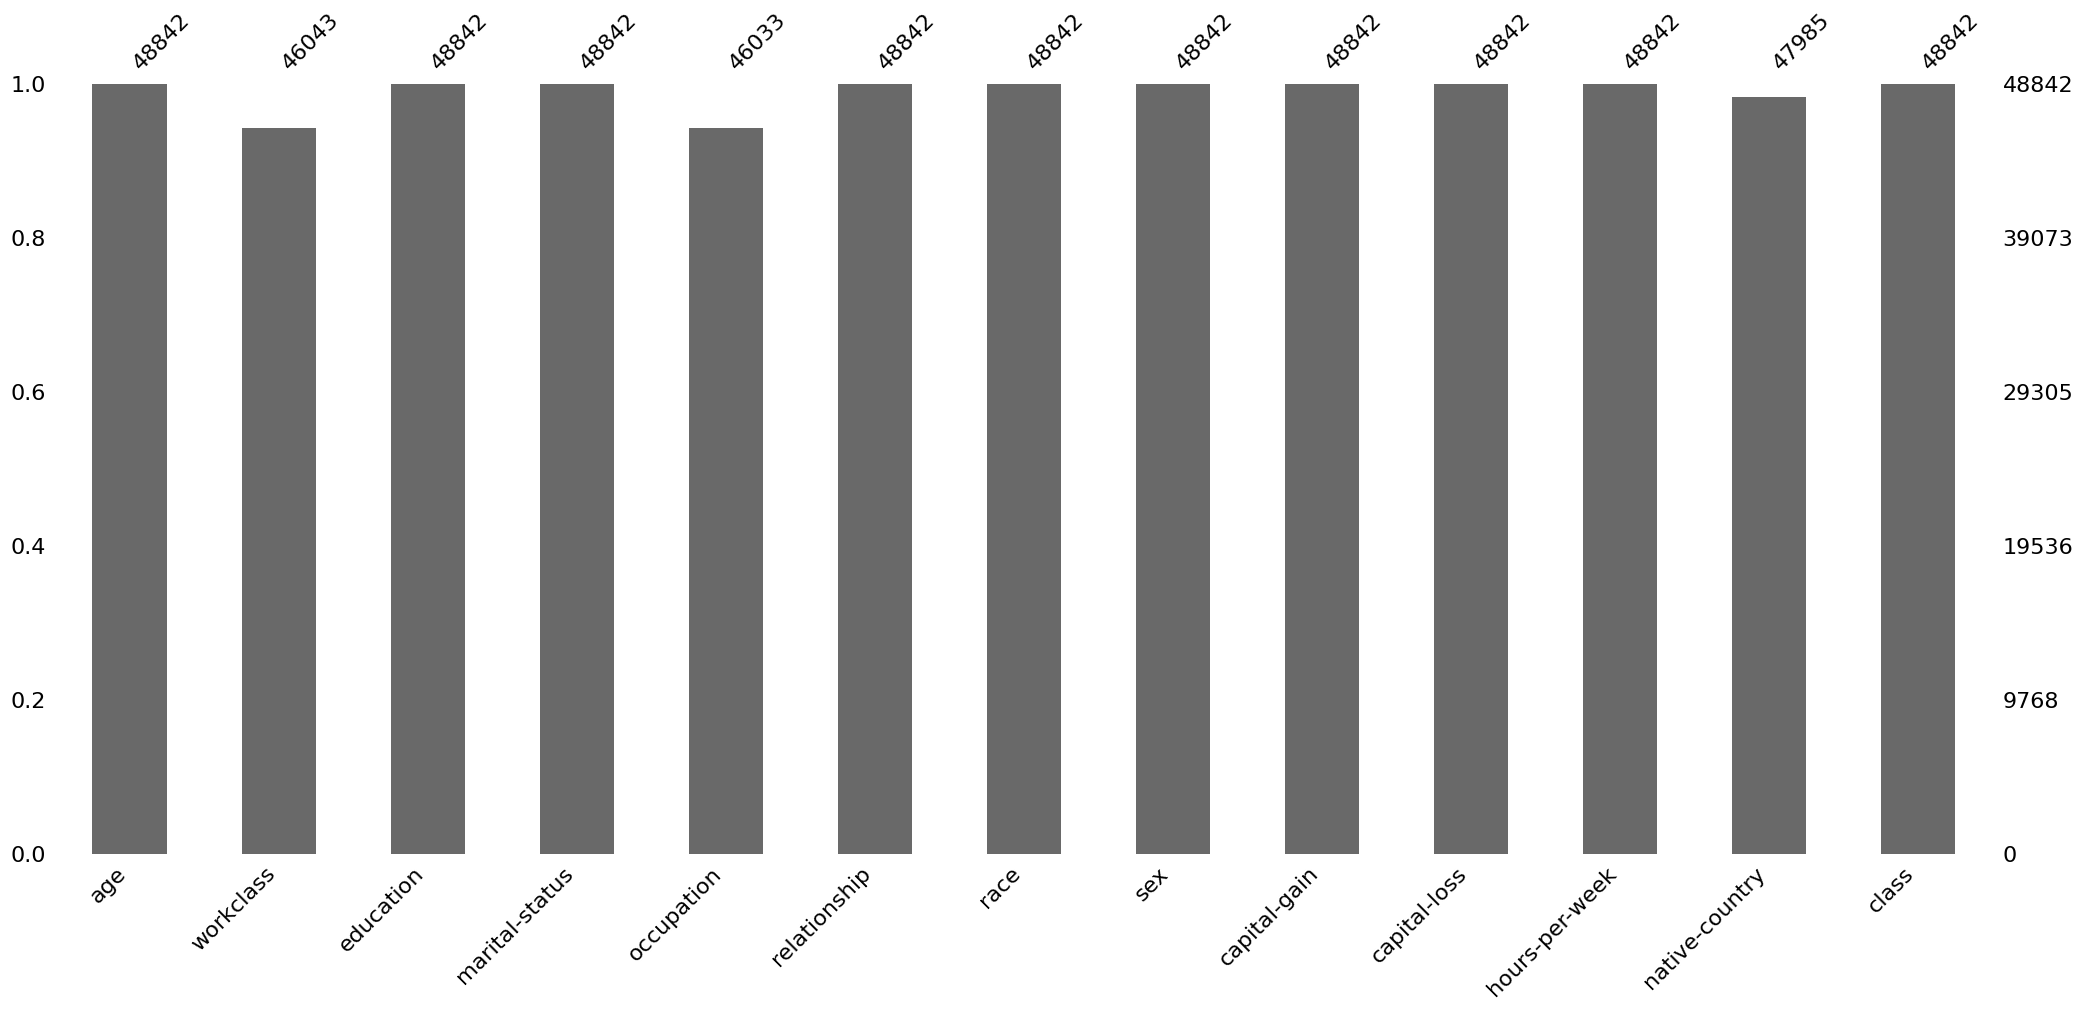

In [13]:
import missingno

missingno.bar(dataset_clean);

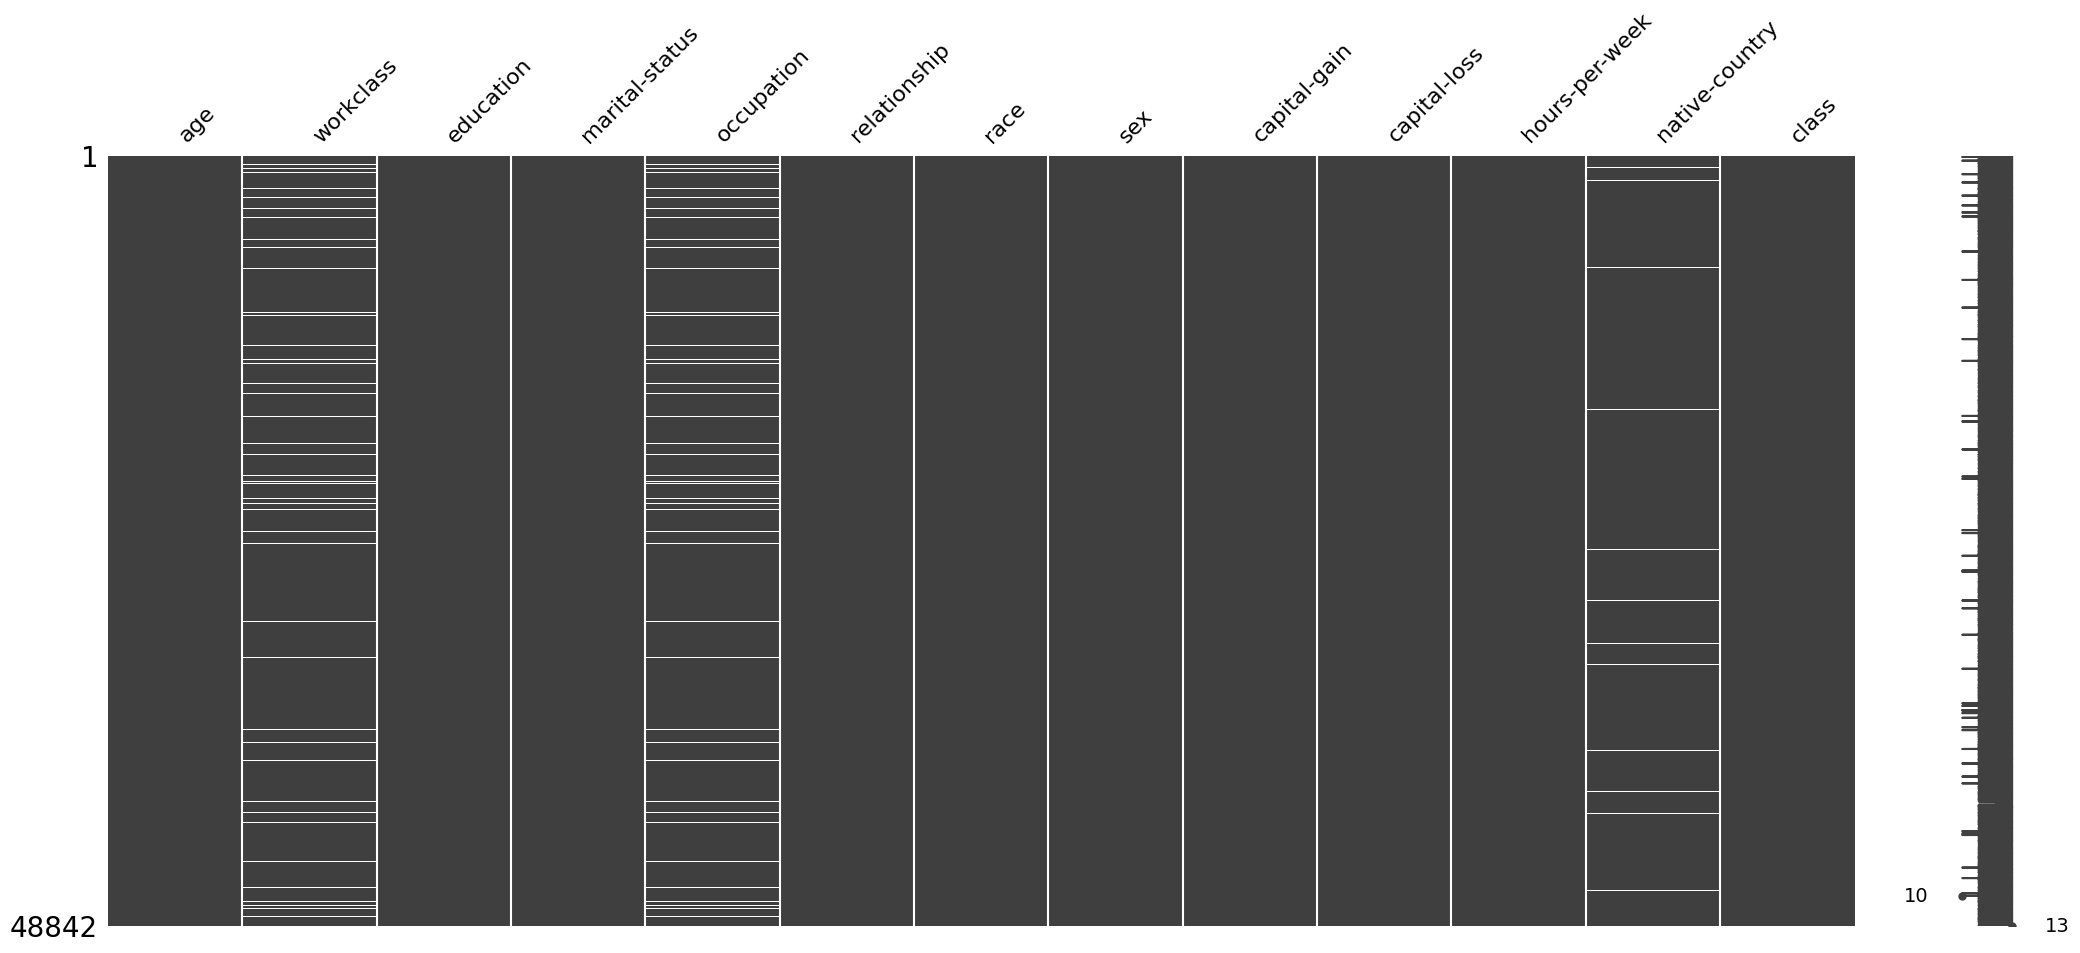

In [14]:
missingno.matrix(dataset_clean);

## Création du fichier `csv`

In [15]:
dataset_final = dataset_clean.dropna().drop_duplicates()

In [16]:
dataset_final.to_csv("data/adult_clean.csv", index=False)